# Surprise Housing - Advanced Regression

### Problem statements:

US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1) Which variables are significant in predicting the price of a house, and

2) How well those variables describe the price of a house.

3) determine the optimal value of lambda for ridge and lasso regression.

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Reading, understanding and visualising the data

In [1]:
# Importing packages used
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#creating dataframe from csv input file
data = pd.read_csv('train.csv')

In [3]:
#metadata of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Number of rows and columns in the dataset
data.shape

(1460, 81)

In [5]:
#quick look at first 5 rows of the data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#statistics
data.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

In [7]:
# Missing values:
def missingValueCount(data, threshold):
    missing_value = data.isnull().sum()
    return missing_value.loc[missing_value > threshold]
missingValueCount(data, 0)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
#check for missing values from each of the column
def missingValuePercentage(data, threshold):
    missing_value = round(data.isnull().sum()/len(data.index),2).sort_values(ascending=False)
    return missing_value.loc[missing_value > threshold]
missingValuePercentage(data, 0)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

In [9]:
#let's consider 10% as threshold for dropping the columns
drop_columns = missingValuePercentage(data, 0.10)
drop_columns

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
LotFrontage    0.18
dtype: float64

In [10]:
data = data.drop(list(drop_columns.index),axis='columns')

In [11]:
#check the columns are dropped successfully or not
missingValuePercentage(data, 0)

GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
BsmtFinType1    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType2    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

In [12]:
#Calculate the age from year
def yearToAge(data,col):
    new_cal = col + '_Old'
    data[new_cal] = data[col].max()-data[col]
#converting year attribute in to age from year
yearToAge(data,'YearBuilt')
yearToAge(data,'YearRemodAdd')
yearToAge(data,'GarageYrBlt')
yearToAge(data,'YrSold')


In [13]:
#check for the newly added columns
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,10,10,10.0,2


In [14]:
#drop the old and un wanted columns
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 'columns')

In [15]:
## Check for the "NA" values and input the values
def inputingMissingValue(data,col,value):
    data[col].fillna(value, inplace = True)
inputingMissingValue(data,'MasVnrType', 'None')
inputingMissingValue(data,'MasVnrArea' ,data.MasVnrArea.mean())
inputingMissingValue(data,'BsmtQual', 'TA')
inputingMissingValue(data,'BsmtCond', 'TA')
inputingMissingValue(data,'BsmtExposure', 'No')
inputingMissingValue(data,'BsmtFinType1', 'Unf')
inputingMissingValue(data,'BsmtFinType2', 'Unf')
inputingMissingValue(data,'GarageType', 'Attchd')
inputingMissingValue(data,'GarageYrBlt_Old', -1)
inputingMissingValue(data,'GarageFinish', 'Unf')
inputingMissingValue(data,'GarageQual', 'TA')
inputingMissingValue(data,'GarageCond', 'TA')

### By looking at the data we can say, Utilities and street explains the low varance and we can drop these two columns

In [16]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [17]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [18]:
# drop the columns
data = data.drop(['Utilities','Street'], axis = 'columns')

In [19]:
#check for missing values
missingValuePercentage(data, 0)

Series([], dtype: float64)

## EDA

In [20]:
#EDA for Categorical columns
cat_columns = data.select_dtypes(include = np.object).columns.tolist()
for col in cat_columns:
    print(col,' : ',data[col].head().unique())

MSZoning  :  ['RL']
LotShape  :  ['Reg' 'IR1']
LandContour  :  ['Lvl']
LotConfig  :  ['Inside' 'FR2' 'Corner']
LandSlope  :  ['Gtl']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge']
Condition1  :  ['Norm' 'Feedr']
Condition2  :  ['Norm']
BldgType  :  ['1Fam']
HouseStyle  :  ['2Story' '1Story']
RoofStyle  :  ['Gable']
RoofMatl  :  ['CompShg']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng']
Exterior2nd  :  ['VinylSd' 'MetalSd' 'Wd Shng']
MasVnrType  :  ['BrkFace' 'None']
ExterQual  :  ['Gd' 'TA']
ExterCond  :  ['TA']
Foundation  :  ['PConc' 'CBlock' 'BrkTil']
BsmtQual  :  ['Gd' 'TA']
BsmtCond  :  ['TA' 'Gd']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av']
BsmtFinType1  :  ['GLQ' 'ALQ']
BsmtFinType2  :  ['Unf']
Heating  :  ['GasA']
HeatingQC  :  ['Ex' 'Gd']
CentralAir  :  ['Y']
Electrical  :  ['SBrkr']
KitchenQual  :  ['Gd' 'TA']
Functional  :  ['Typ']
GarageType  :  ['Attchd' 'Detchd']
GarageFinish  :  ['RFn' 'Unf']
GarageQual  :  ['TA']
GarageCond  :  ['TA']
PavedDrive  :  ['Y']
SaleTy

In [21]:
#EDA for nemeric columns
num_columns = data.select_dtypes(include = np.number).columns.tolist()
num_columns.remove('SalePrice')

<Figure size 432x288 with 0 Axes>

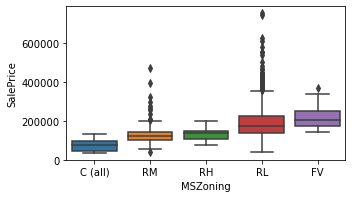

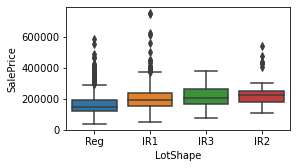

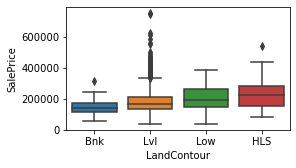

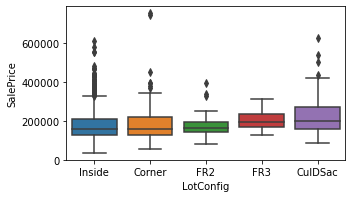

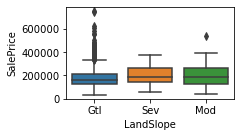

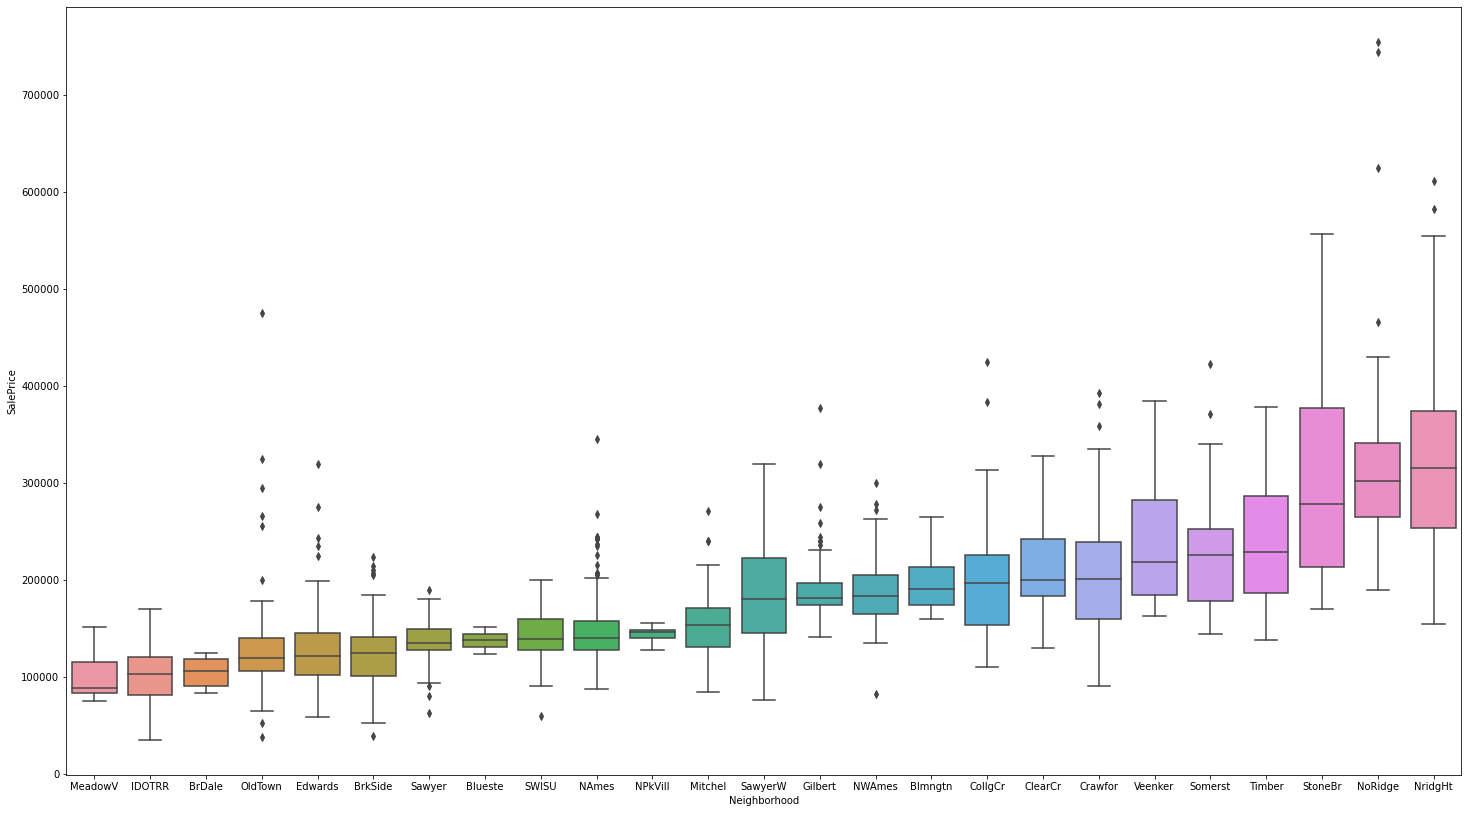

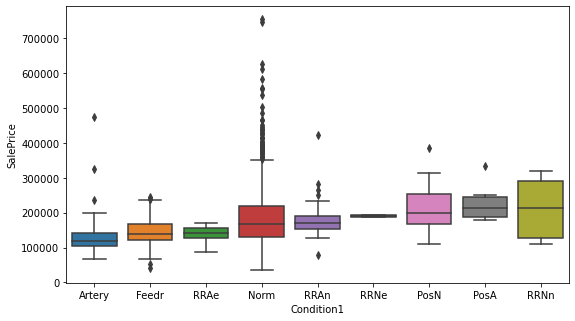

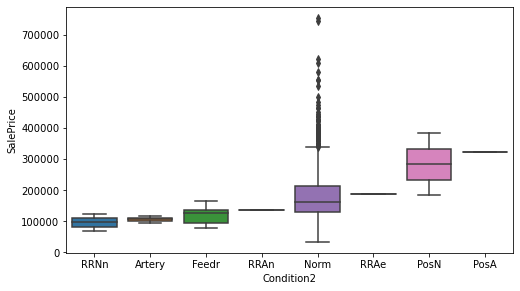

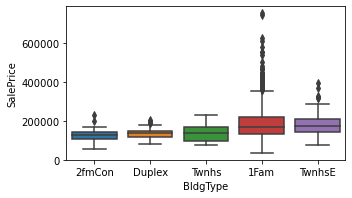

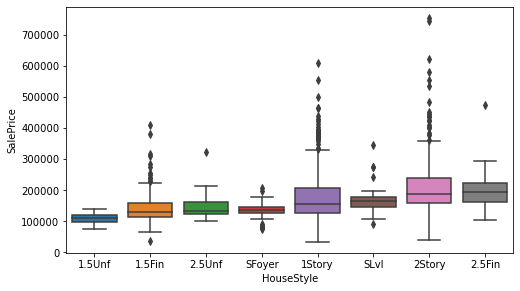

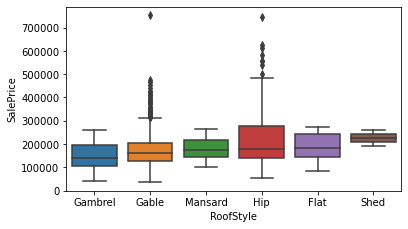

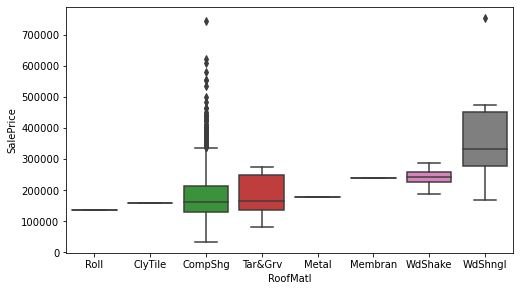

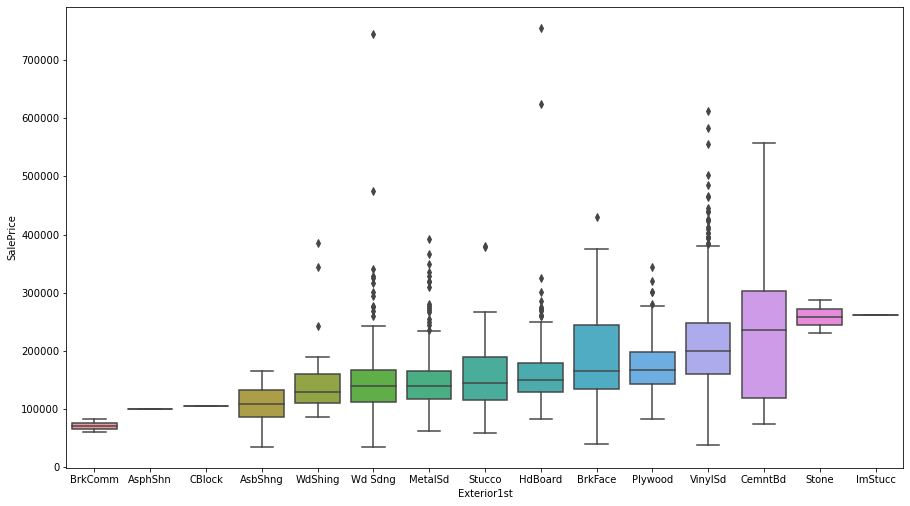

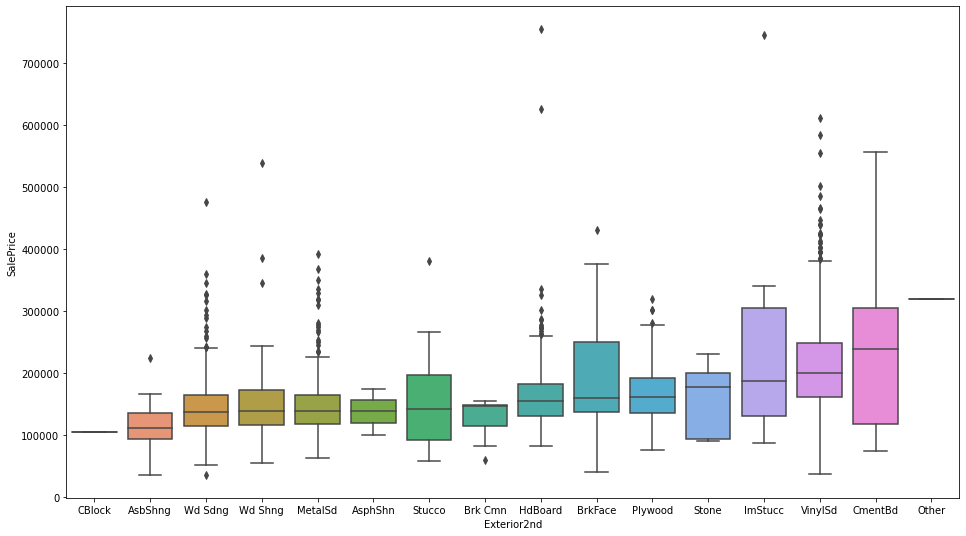

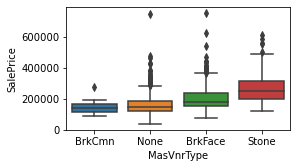

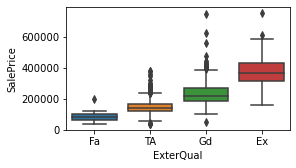

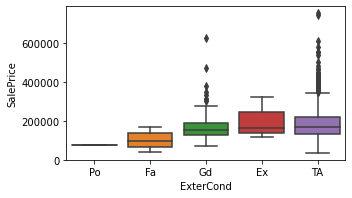

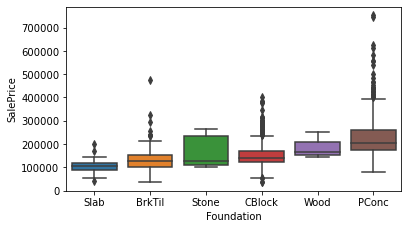

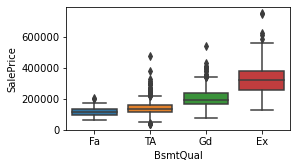

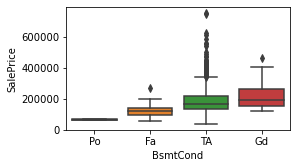

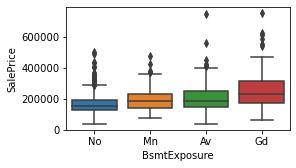

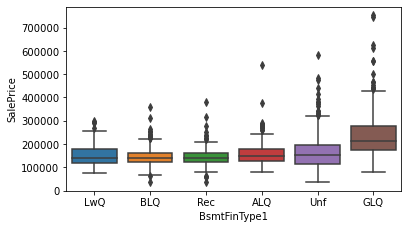

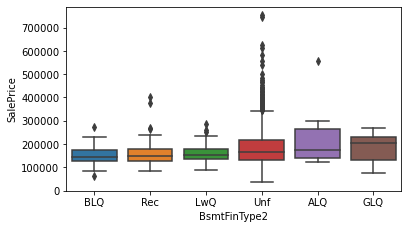

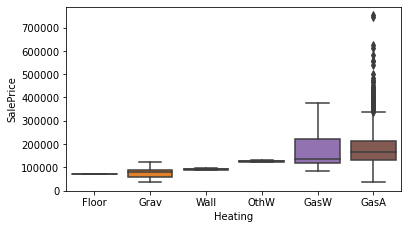

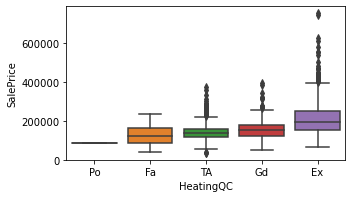

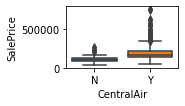

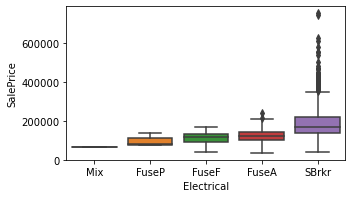

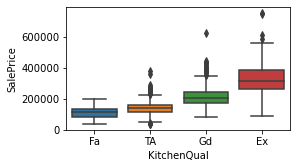

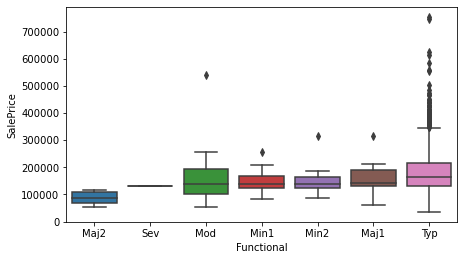

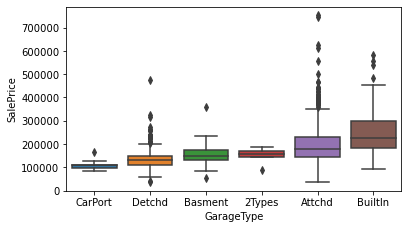

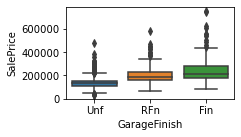

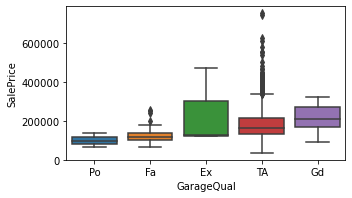

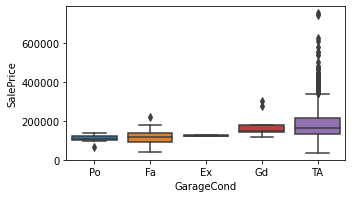

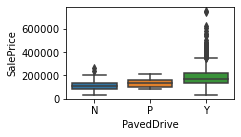

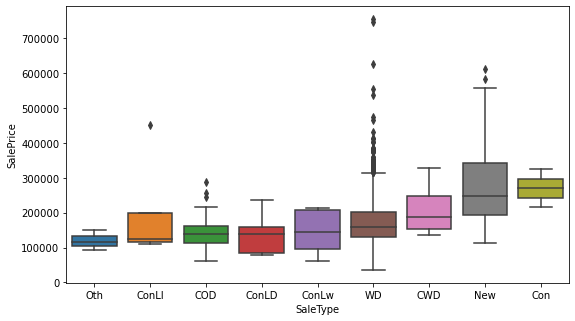

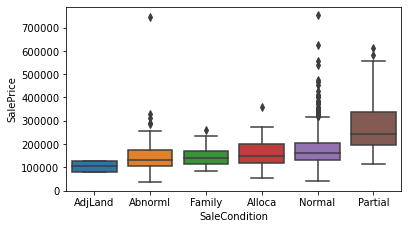

In [22]:
#create graph for categorical attributes
def categoricalColAnalysis(data, index,independent_variable ,target_variable):
    plt.figure(index)
    variables = data[[independent_variable]].nunique()
    plt.figure(figsize = (variables,variables/1.77))
    my_order = data[[independent_variable,target_variable]].groupby(by = [independent_variable])[target_variable].median().sort_values(ascending=True)
    sns.boxplot(x = independent_variable, y = target_variable, data= data[[independent_variable,target_variable]], order = my_order.index)

for index, col in enumerate(cat_columns):
    categoricalColAnalysis(data, index, col, 'SalePrice')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

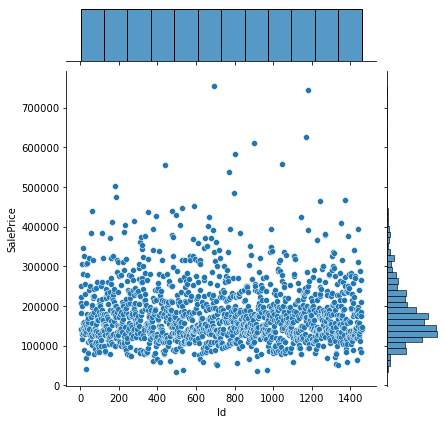

<Figure size 1440x1872 with 0 Axes>

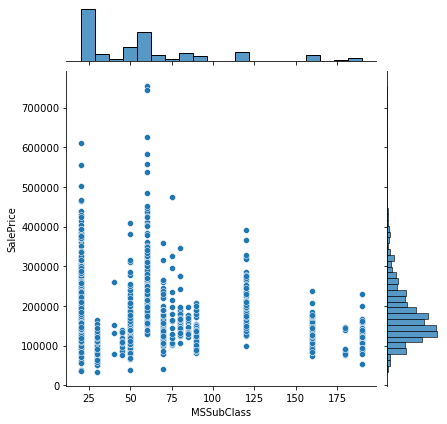

<Figure size 1440x1872 with 0 Axes>

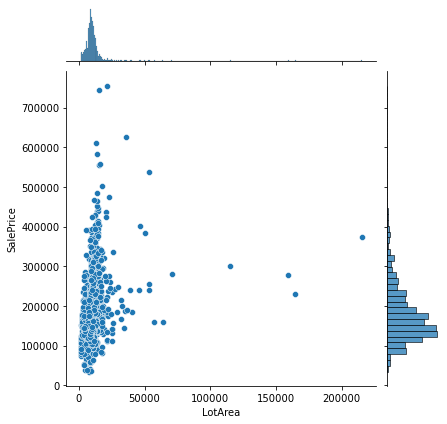

<Figure size 1440x1872 with 0 Axes>

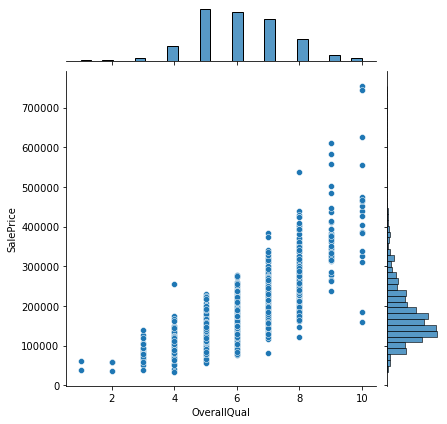

<Figure size 1440x1872 with 0 Axes>

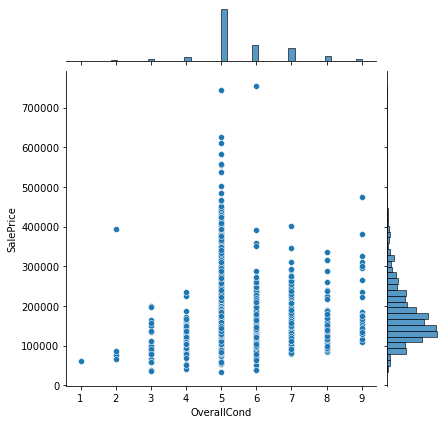

<Figure size 1440x1872 with 0 Axes>

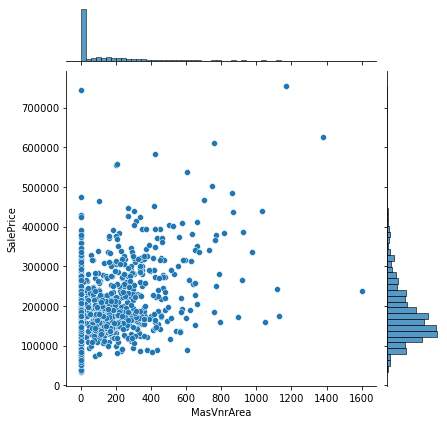

<Figure size 1440x1872 with 0 Axes>

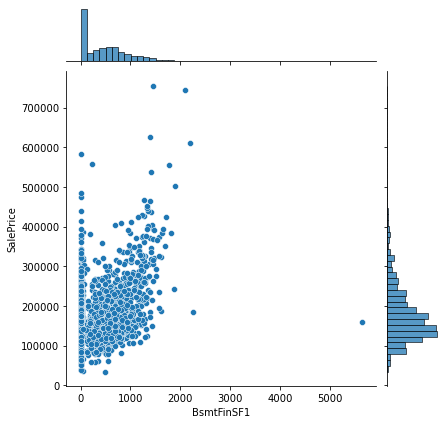

<Figure size 1440x1872 with 0 Axes>

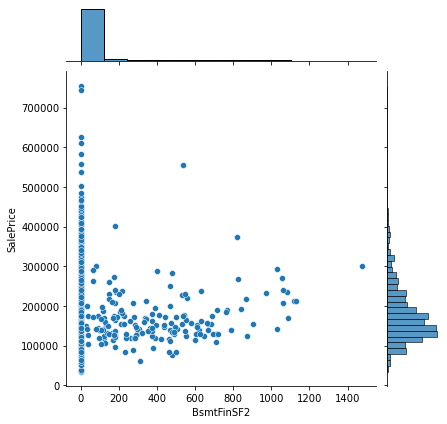

<Figure size 1440x1872 with 0 Axes>

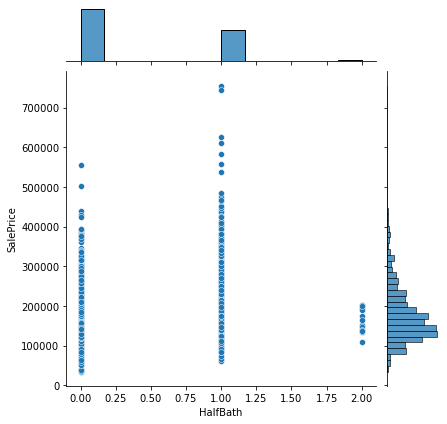

<Figure size 1440x1872 with 0 Axes>

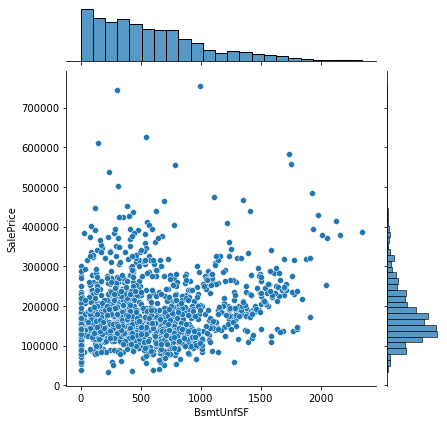

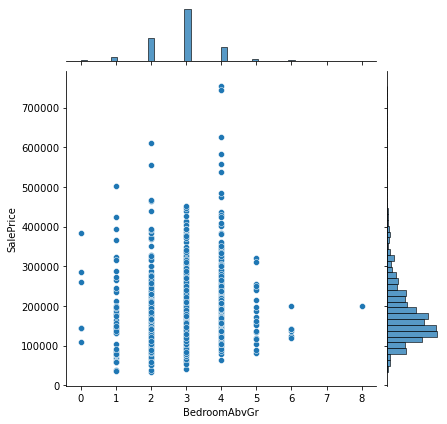

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

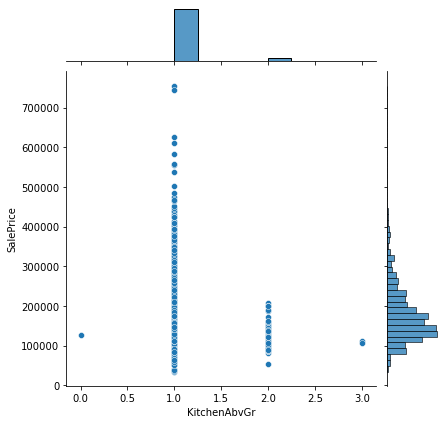

<Figure size 1440x1872 with 0 Axes>

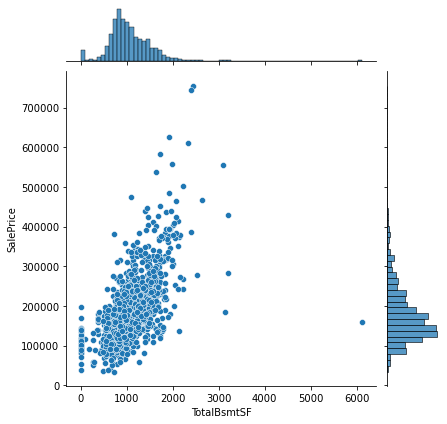

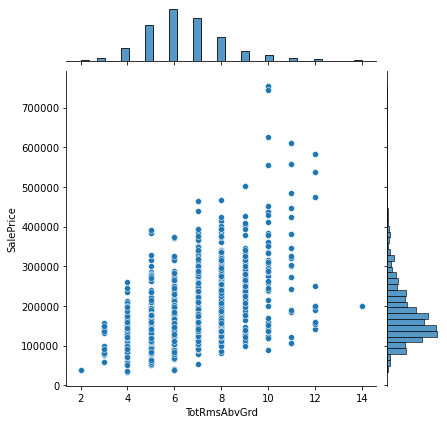

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

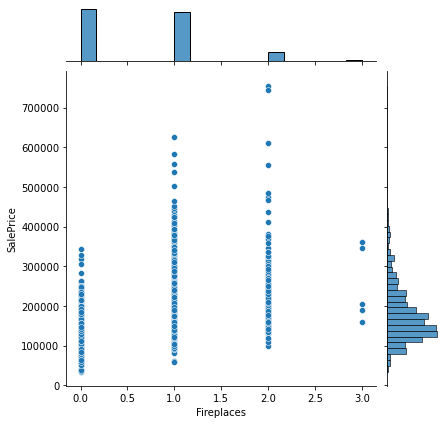

<Figure size 1440x1872 with 0 Axes>

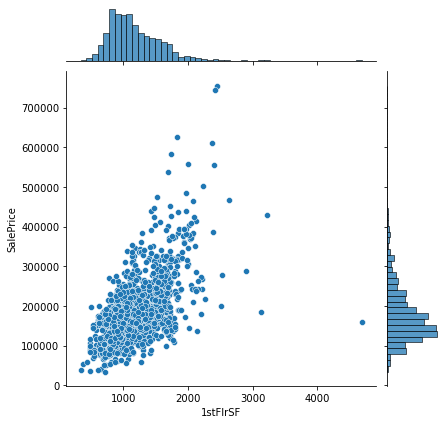

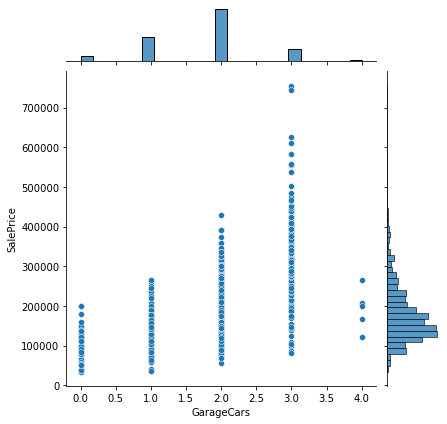

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

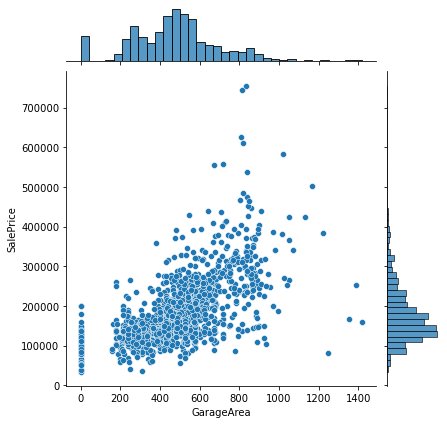

<Figure size 1440x1872 with 0 Axes>

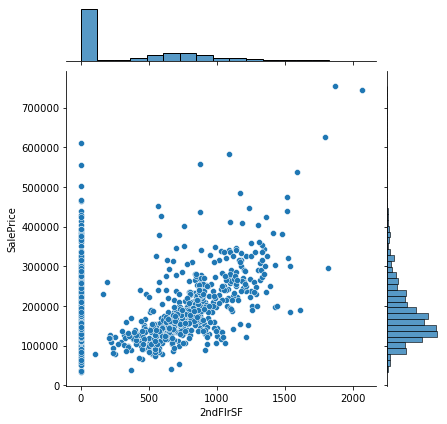

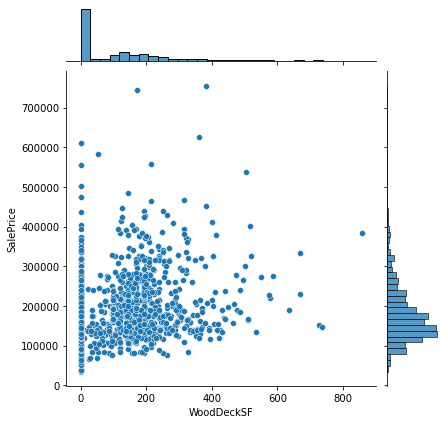

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

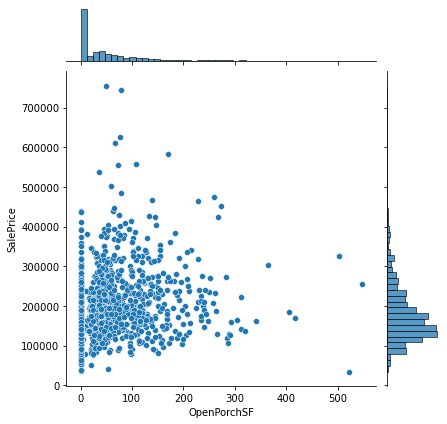

<Figure size 1440x1872 with 0 Axes>

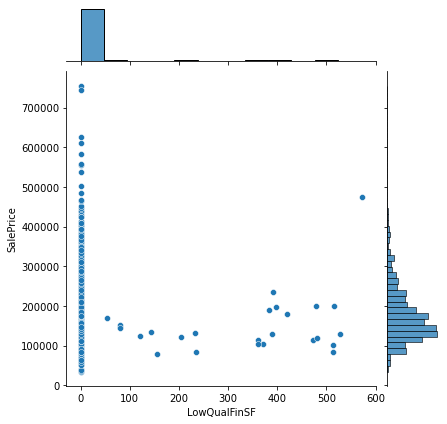

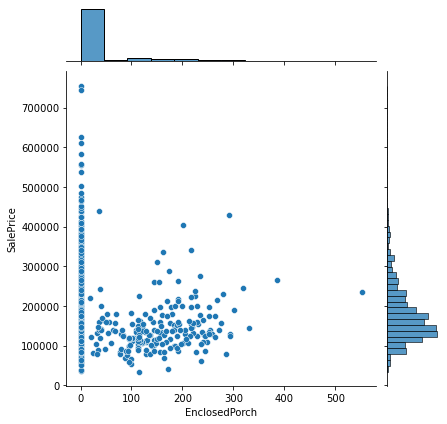

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

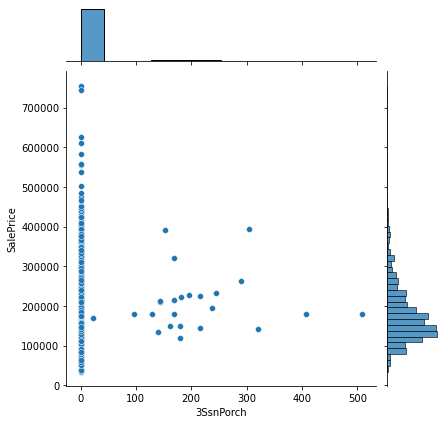

<Figure size 1440x1872 with 0 Axes>

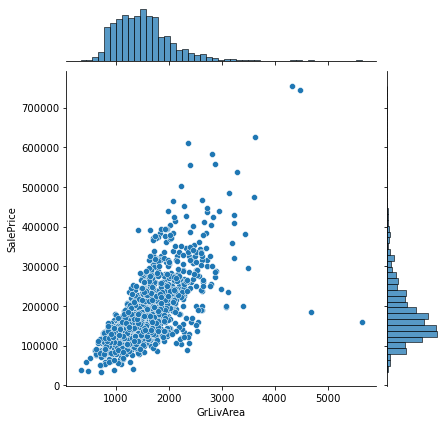

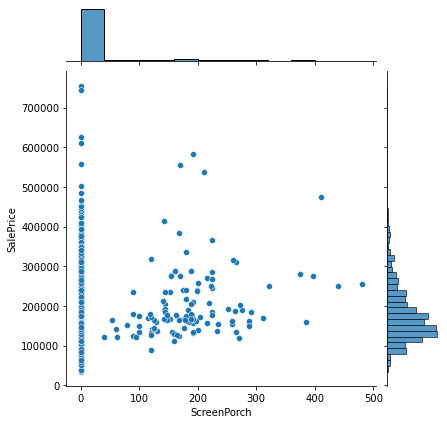

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

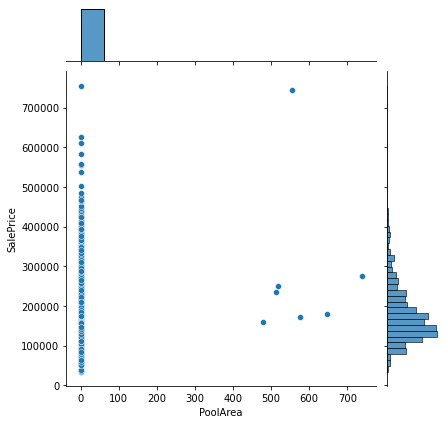

<Figure size 1440x1872 with 0 Axes>

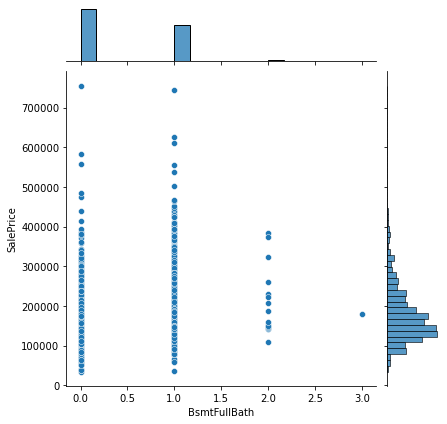

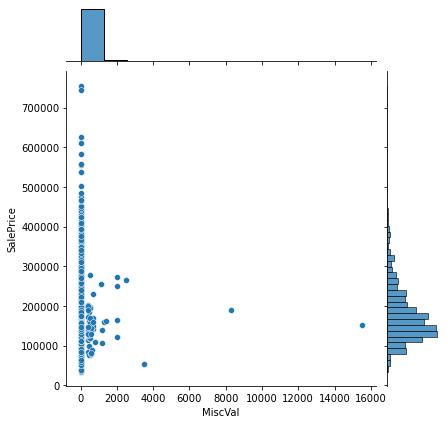

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

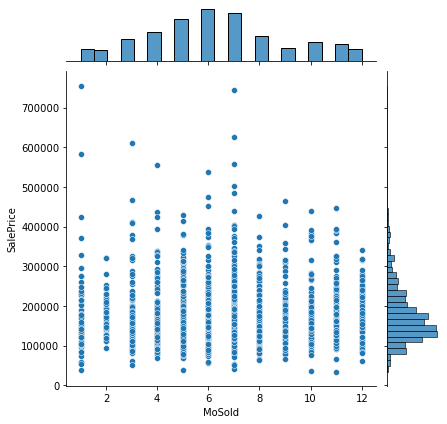

<Figure size 1440x1872 with 0 Axes>

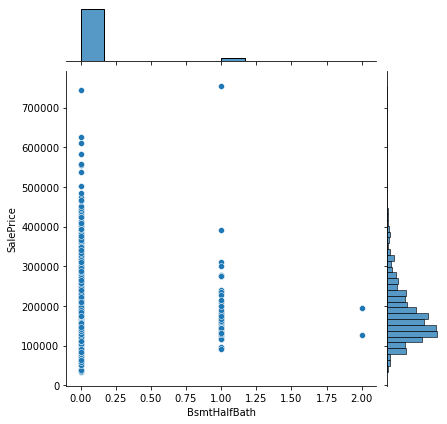

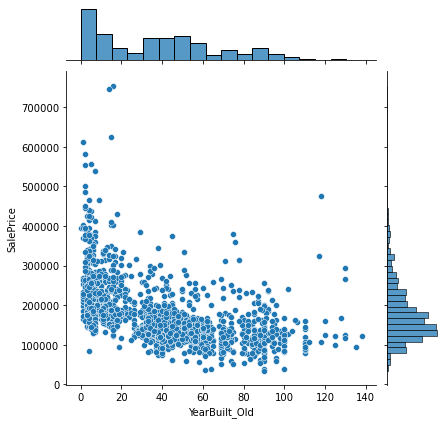

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

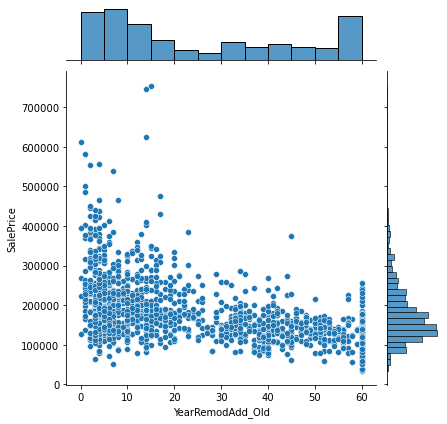

<Figure size 1440x1872 with 0 Axes>

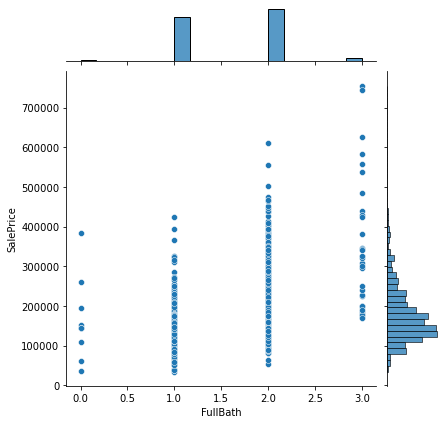

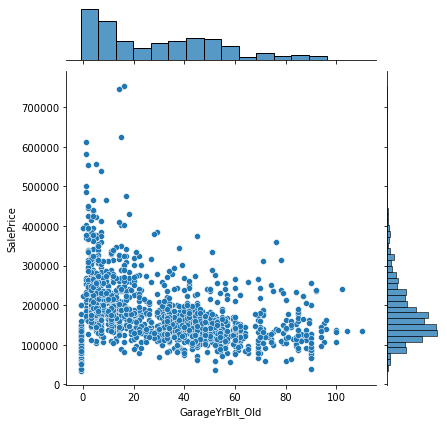

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

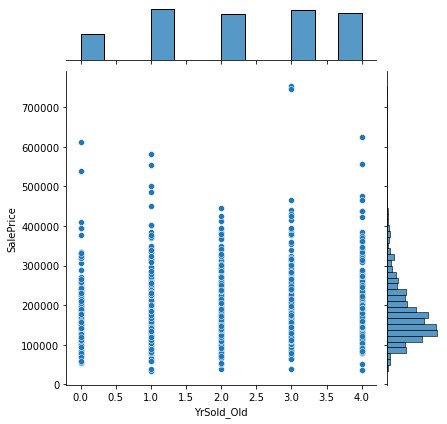

In [23]:
#create graph for numeric attributes
def numericColAnalysis(data, index,independent_variable ,target_variable):
    plt.figure(figsize = (20, 26))
    plt.figure(index)
    sns.jointplot(x = independent_variable, y = target_variable, data = data[[independent_variable,target_variable]])

for index, col in enumerate(num_columns):
    numericColAnalysis(data, index, col, 'SalePrice')

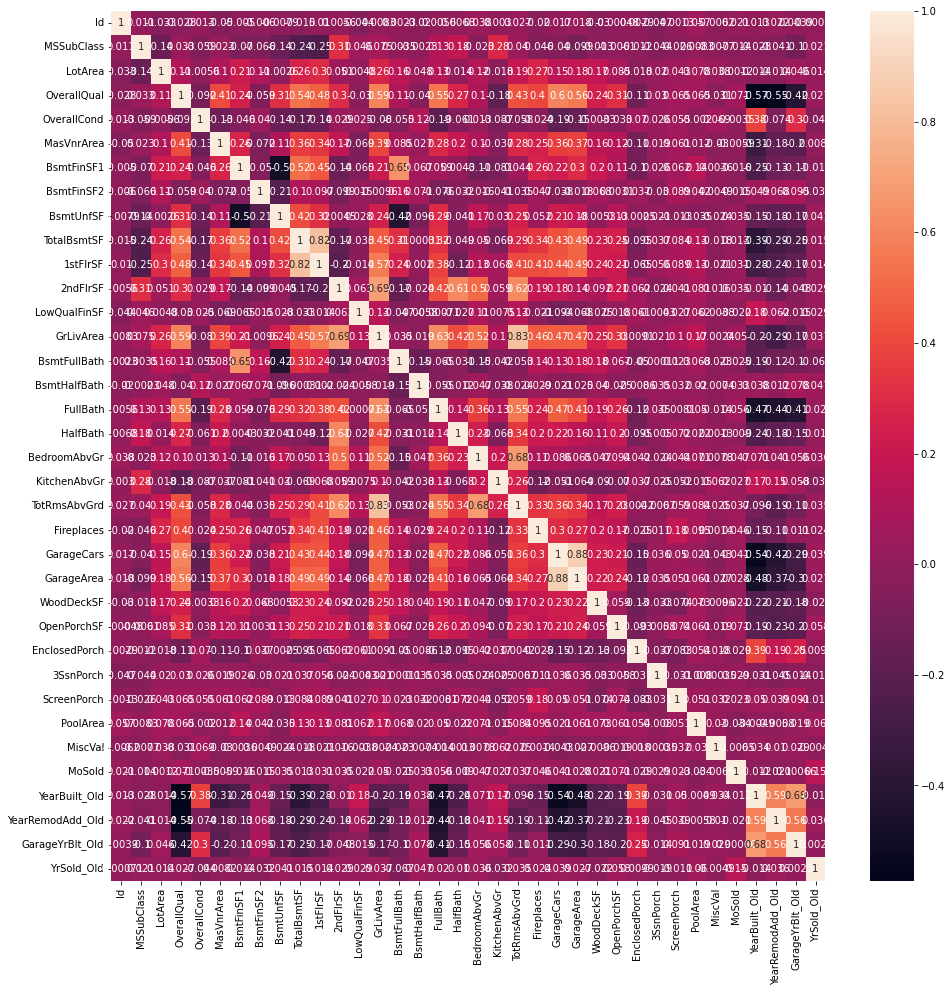

In [24]:
# Plot the Heat map(for numerical attributes) to find the correleations between the attributes

plt.figure(figsize=(16,16))
sns.heatmap(data[num_columns].corr(), annot = True)
plt.show()


# Data Preparation

In [25]:
def drop_Outliers_attributes(data, num_columns):
    list = []
    for col in num_columns:
        Q1 = data[col].quantile(.25)
        Q3 = data[col].quantile(.99)
        IQR = Q3-Q1
        data =  data[(data[col] >= (Q1-(1.5*IQR))) & (data[col] <= (Q3+(1.5*IQR)))] 
    return data
num_columns = ['TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','SalePrice','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2']
data = drop_Outliers_attributes(data, num_columns)

In [26]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,1,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,10,10,10.0,2


### Convert categorical arrtibutes to numberic by mapping it to 0, 1, 2,...n

In [27]:
data["LotShape"] = data["LotShape"].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [28]:
data["GarageCond"] = data["GarageCond"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [29]:
data["ExterCond"] = data["ExterCond"].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

In [30]:
data["LandSlope"] = data["LandSlope"].map({'Gtl':0,'Mod':1,'Sev':2})
data["BsmtFinType1"] = data["BsmtFinType1"].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data["BsmtFinType2"] = data["BsmtFinType2"].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data["HeatingQC"] = data["HeatingQC"].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data["BsmtExposure"] = data["BsmtExposure"].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data["CentralAir"] = data["CentralAir"].map({'N':0,'Y':1})
data["KitchenQual"] = data["KitchenQual"].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data["GarageFinish"] = data["GarageFinish"].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
data["GarageQual"] = data["GarageQual"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data["ExterQual"] = data["ExterQual"].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data["BsmtQual"] = data["BsmtQual"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data["BsmtCond"] = data["BsmtCond"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [31]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,1,60,RL,8450,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,9600,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,11250,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,9550,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,14260,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,10,10,10.0,2


In [32]:
#create dummy attributes and join the dummy atributes with the data "dataframe"
attributes_dummy = pd.get_dummies(data[['Exterior2nd','Foundation','RoofStyle','RoofMatl','Exterior1st','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','MasVnrType']],drop_first=True)

data = pd.concat([data,attributes_dummy],axis='columns')

data = data.drop(['Exterior2nd','Foundation','RoofStyle','RoofMatl','Exterior1st','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','MasVnrType'],axis='columns')

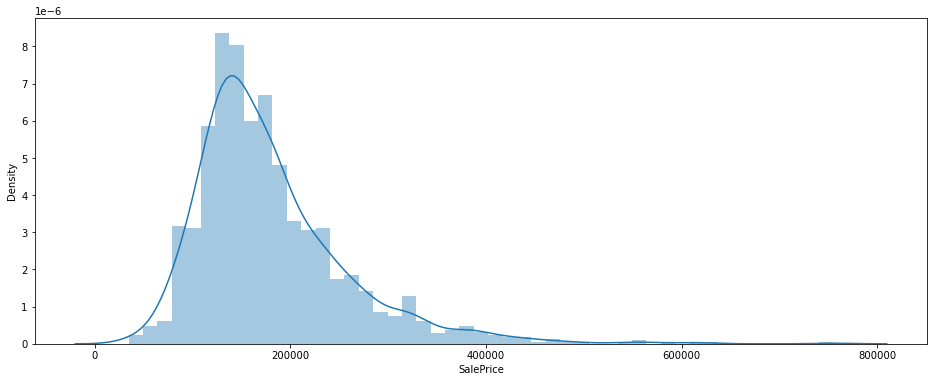

In [33]:
# Create the distplot and see how the distribution looks for the housing saleprice
plt.figure(figsize=(16,6))
sns.distplot(data.SalePrice)
plt.show()

## Test-Train Split and scaling the data

In [34]:
df_train,df_test = train_test_split(data,test_size=0.3,train_size=0.7,random_state=50)

In [35]:
num_attributes = data.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
df_train[num_attributes] = scaler.fit_transform(df_train[num_attributes])
df_test[num_attributes] = scaler.transform(df_test[num_attributes])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

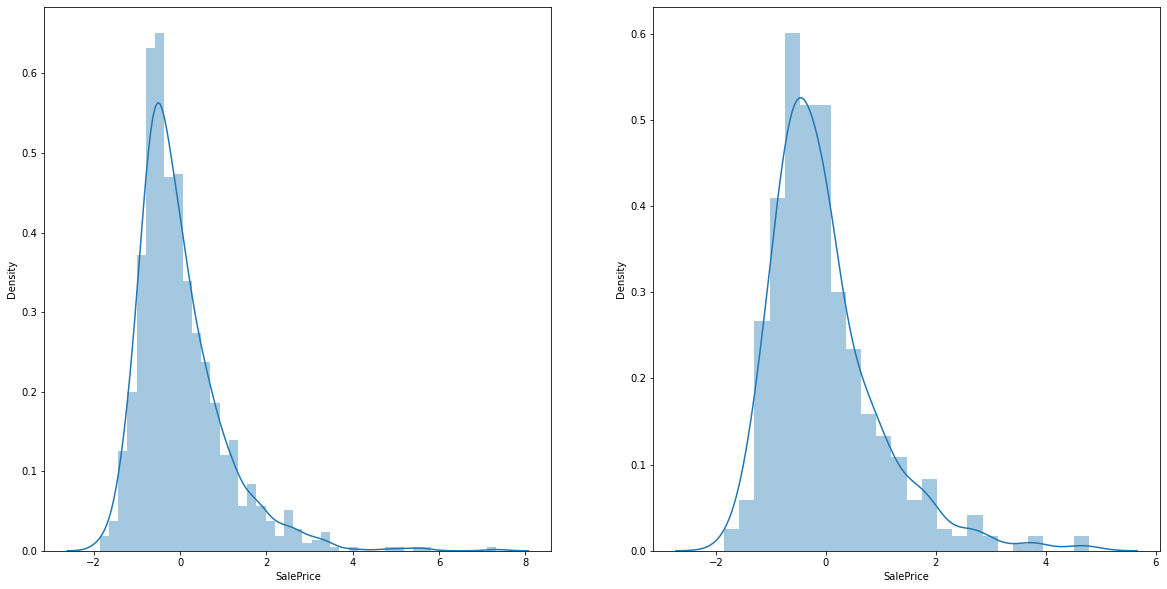

In [36]:
#Look at the distribution on test and training data
plt.figure(figsize=(20,10))
plt.subplot(122)
sns.distplot(df_test.SalePrice)
plt.subplot(121)
sns.distplot(df_train.SalePrice)

## Model Training

In [37]:
y_test_data = df_test.pop('SalePrice')
X_test_data = df_test

In [38]:
y_train_data = df_train.pop('SalePrice')
X_train_data = df_train

In [39]:
len(X_train_data.columns)

194

In [40]:
# Running RFE with the output number of the variable equal to 70
lm  = LinearRegression()
lm.fit(X_train_data,y_train_data)
rfe = RFE(lm,step=70)
rfe.fit(X_train_data,y_train_data)

RFE(estimator=LinearRegression(), step=70)

In [41]:
rfe_1 = pd.DataFrame(list(zip(X_train_data.columns,rfe.support_,rfe.ranking_)))
rfe_1.columns = ['Column_Names','Status','Rank']

In [42]:
#RFE attributes
rfe_selected_columns = list(rfe_1[rfe_1.Status==True].Column_Names)
rfe_selected_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PoolArea',
 'MoSold',
 'YearBuilt_Old',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'He

In [43]:
X_train_data = X_train_data[rfe_selected_columns]
X_test_data = X_test_data[rfe_selected_columns]

### Build the model by Ridge Regression

In [44]:
# y_train_data, X_train_data
# y_test_data, X_test_data

In [45]:
#let try the ridge regression with alha values of 0.001
rid = Ridge(alpha=0.001)
rid.fit(X_train_data,y_train_data)

y_train_prediction = rid.predict(X_train_data)
print(r2_score(y_train_data,y_train_prediction))
y_test_prediction = rid.predict(X_test_data)
print(r2_score(y_test_data,y_test_prediction))

0.913771551444767
0.8884267161884315


In [46]:
fold  = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_params = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

mod = Ridge()

mod_cv = GridSearchCV(estimator=mod,
                        param_grid=hyper_params,
                        scoring='r2',
                        cv=fold,
                        verbose=1,
                        n_jobs = -1,
                        return_train_score=True)
                        

mod_cv.fit(X_train_data,y_train_data)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [47]:
cv_result_ridge = pd.DataFrame(mod_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')
cv_result_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.025091,0.019633,0.002370,0.001984,0.001,{'alpha': 0.001},0.831119,0.586970,0.920543,0.859974,0.901305,0.898968,0.685524,0.912107,0.919017,0.885942,0.840147,0.107536,10,0.917993,0.924192,0.912489,0.914113,0.913629,0.913746,0.926667,0.912935,0.910747,0.914410,0.916092,0.005009
1,0.007832,0.001406,0.004555,0.001490,0.010,{'alpha': 0.01},0.831114,0.586988,0.920542,0.860011,0.901321,0.898968,0.685578,0.912107,0.919020,0.885961,0.840161,0.107527,9,0.917993,0.924192,0.912489,0.914113,0.913629,0.913746,0.926667,0.912935,0.910747,0.914410,0.916092,0.005009
2,0.008824,0.002395,0.004807,0.003069,0.100,{'alpha': 0.1},0.831067,0.587162,0.920529,0.860364,0.901468,0.898966,0.686104,0.912105,0.919054,0.886151,0.840297,0.107435,8,0.917993,0.924192,0.912489,0.914112,0.913629,0.913746,0.926666,0.912934,0.910746,0.914409,0.916092,0.005009
3,0.009046,0.001446,0.004395,0.000540,0.200,{'alpha': 0.2},0.831018,0.587357,0.920515,0.860720,0.901614,0.898963,0.686661,0.912103,0.919092,0.886356,0.840440,0.107335,7,0.917992,0.924191,0.912487,0.914109,0.913628,0.913745,0.926664,0.912933,0.910745,0.914408,0.916090,0.005009
4,0.007820,0.001478,0.003532,0.000503,0.500,{'alpha': 0.5},0.830891,0.587944,0.920472,0.861603,0.901969,0.898953,0.688175,0.912094,0.919213,0.886936,0.840825,0.107048,6,0.917988,0.924188,0.912481,0.914091,0.913622,0.913739,0.926648,0.912926,0.910740,0.914398,0.916082,0.005008


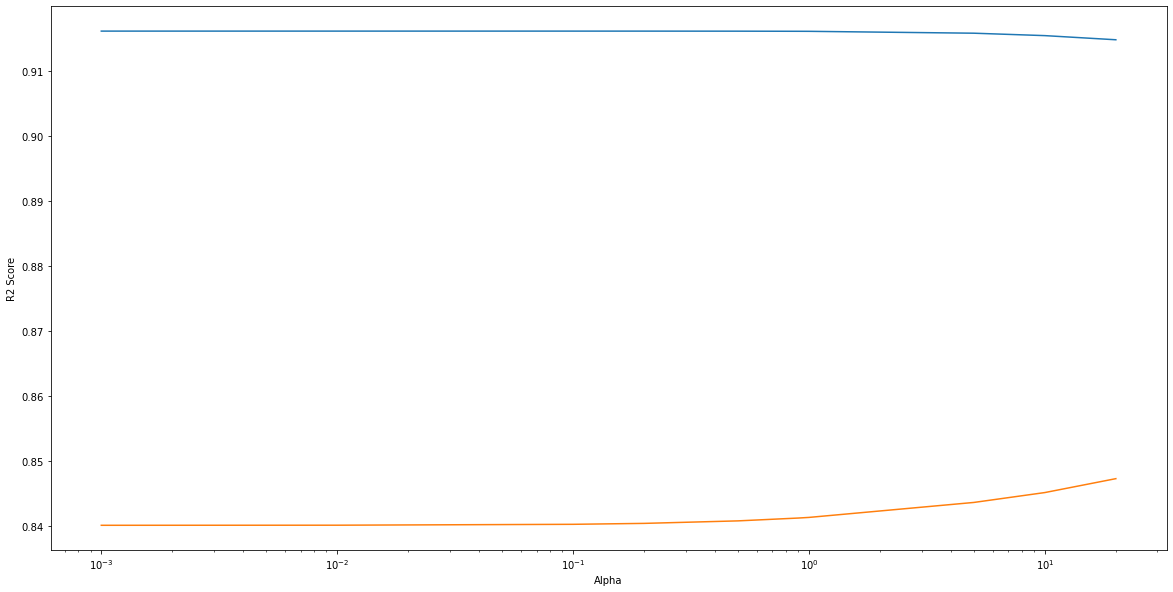

In [48]:
# create comparision of train score and test score
plt.figure(figsize=(20,10))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [49]:
# validate the best alpha parameter
mod_cv.best_params_

{'alpha': 20.0}

In [50]:
#let's predict the test and train scores with alpha values of 20
rid = Ridge(alpha = 20.0)
rid.fit(X_train_data,y_train_data)

y_prediction_train = rid.predict(X_train_data)
print(r2_score(y_train_data,y_prediction_train))

y_prediction_test = rid.predict(X_test_data)
print(r2_score(y_test_data,y_prediction_test))

0.9126562921342257
0.8955501198545992


In [51]:
mod_parameter = list(rid.coef_)
mod_parameter.insert(0,rid.intercept_)
columns = df_train.columns
columns.insert(0,'constant')
ridge_coeficient = pd.DataFrame(list(zip(columns,mod_parameter)))
ridge_coeficient.columns = ['Feaure','Coef']

In [52]:
#Let's check the top to attributes that has best coefficients by sorting the coefficient column from the above table
ridge_coeficient.sort_values(by = 'Coef',ascending = False).head(10)

,Feaure,Coef
15,BsmtFinType2,0.187644
2,LotArea,0.152636
13,BsmtFinType1,0.151921
8,ExterQual,0.103121
83,Exterior1st_BrkComm,0.100111
11,BsmtCond,0.090277
65,Exterior2nd_Wd Shng,0.086476
12,BsmtExposure,0.082478
4,LandSlope,0.081575
70,Foundation_Wood,0.080536


### Build the model by Lasso Regression

In [53]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_data,y_train_data)

y_train_prediction = lm.predict(X_train_data)
print(r2_score(y_true=y_train_data,y_pred=y_train_prediction))

y_test_prediction  = lm.predict(X_test_data)
print(r2_score(y_true=y_test_data,y_pred=y_test_prediction))

0.9125250596144725
0.896362807736054


In [54]:
model_par = list(lm.coef_)
model_par.insert(0,lm.intercept_)
model_par = [round(x,3) for x in mod_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_par))

[('Id', 0.0),
 ('MSSubClass', 0.032),
 ('LotArea', 0.153),
 ('LotShape', 0.075),
 ('LandSlope', 0.082),
 ('OverallQual', 0.068),
 ('OverallCond', 0.055),
 ('MasVnrArea', 0.06),
 ('ExterQual', 0.103),
 ('ExterCond', 0.011),
 ('BsmtQual', -0.023),
 ('BsmtCond', 0.09),
 ('BsmtExposure', 0.082),
 ('BsmtFinType1', 0.152),
 ('BsmtFinSF1', -0.012),
 ('BsmtFinType2', 0.188),
 ('BsmtFinSF2', -0.053),
 ('BsmtUnfSF', -0.05),
 ('TotalBsmtSF', 0.042),
 ('HeatingQC', 0.076),
 ('CentralAir', 0.036),
 ('1stFlrSF', 0.034),
 ('2ndFlrSF', 0.043),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', -0.025),
 ('BsmtFullBath', -0.052),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.054),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', 0.038),
 ('KitchenAbvGr', 0.038),
 ('KitchenQual', 0.028),
 ('TotRmsAbvGrd', 0.039),
 ('Fireplaces', 0.026),
 ('GarageFinish', 0.01),
 ('GarageCars', 0.007),
 ('GarageArea', 0.019),
 ('GarageQual', 0.015),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.015),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3S

In [55]:
fold = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_params = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

mod = Lasso()

mod_cv = GridSearchCV(estimator = mod,
                        param_grid=hyper_params,
                        scoring='r2',
                        cv=fold,
                        verbose=1,
                        return_train_score=True,
                        n_jobs = -1
                       )

mod_cv.fit(X_train_data,y_train_data)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
# Let have a look on the summery of test and train score based on alpha
cv_result_lasso = pd.DataFrame(mod_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.062401,0.012067,0.002708,0.001277,0.001,{'alpha': 0.001},0.827771,0.590731,0.918421,0.863958,0.903716,0.898514,0.691375,0.910333,0.920585,0.893348,0.841875,0.106223,1,0.917076,0.923260,0.911243,0.912488,0.912415,0.912605,0.925142,0.911730,0.909676,0.912905,0.914854,0.005015
1,0.015671,0.015979,0.004381,0.006190,0.010,{'alpha': 0.01},0.816370,0.652691,0.922362,0.844321,0.892178,0.891021,0.656549,0.893729,0.921204,0.883851,0.837427,0.096313,2,0.906377,0.913090,0.901250,0.901843,0.901611,0.902390,0.914264,0.901255,0.898120,0.902046,0.904225,0.005095
2,0.007588,0.005261,0.002909,0.003070,0.100,{'alpha': 0.1},0.749265,0.885010,0.888980,0.768631,0.812878,0.808297,0.632799,0.821740,0.873688,0.819648,0.806094,0.072671,3,0.825866,0.816672,0.814584,0.819355,0.815547,0.821696,0.844304,0.814836,0.807687,0.813591,0.819414,0.009511
3,0.005919,0.004182,0.004198,0.003921,1.000,{'alpha': 1.0},-0.070676,-0.009829,-0.001243,-0.049456,-0.001949,-0.001137,-0.029487,-0.002556,-0.000061,-0.073029,-0.023942,0.028322,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.011414,0.006655,0.002921,0.001398,5.000,{'alpha': 5.0},-0.070676,-0.009829,-0.001243,-0.049456,-0.001949,-0.001137,-0.029487,-0.002556,-0.000061,-0.073029,-0.023942,0.028322,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


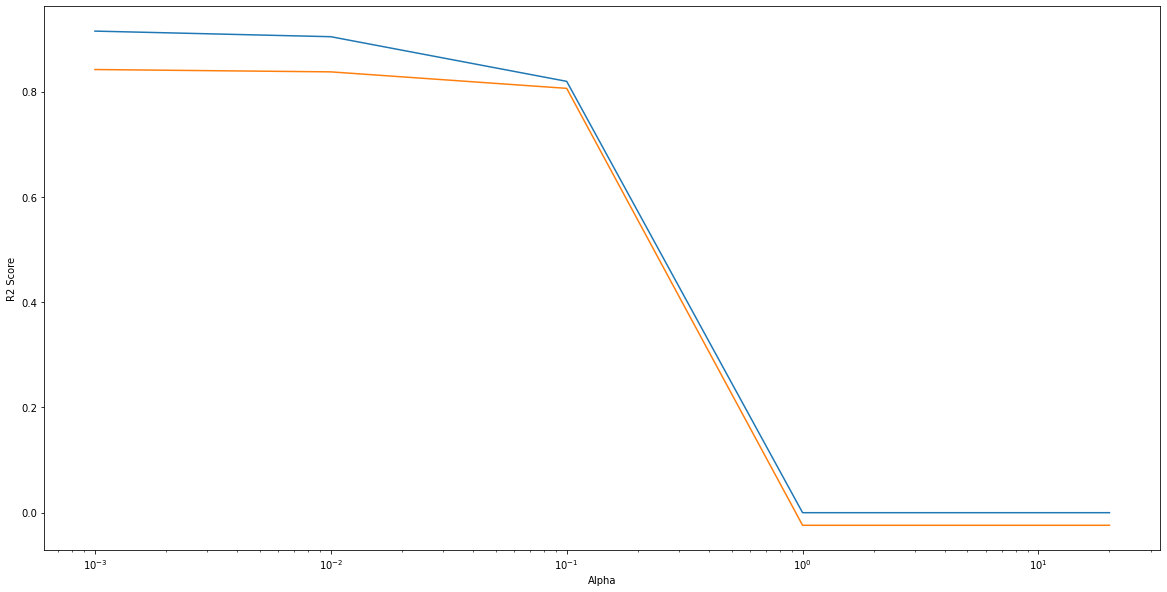

In [57]:
# Plot showing comparision of test and train score
plt.figure(figsize=(20,10))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [58]:
mod_cv.best_params_

{'alpha': 0.001}

In [59]:
las = Lasso(alpha=0.001)
las.fit(X_train_data,y_train_data)

y_train_pred = las.predict(X_train_data)
y_test_pred = las.predict(X_test_data)

print(r2_score(y_true=y_train_data,y_pred=y_train_pred))
print(r2_score(y_true=y_test_data,y_pred=y_test_pred))

0.9125250596144725
0.896362807736054


In [60]:
mod_param = list(las.coef_)
mod_param.insert(0,las.intercept_)
cols = df_train.columns
cols.insert(0,'const')
las_coef = pd.DataFrame(list(zip(cols,mod_param)))
las_coef.columns = ['Featuere','Coef']

In [61]:
# Significant variables which predict price of house when used lasso
las_coef.sort_values(by='Coef',ascending=False).head(15)

,Featuere,Coef
15,BsmtFinType2,0.314776
2,LotArea,0.158151
8,ExterQual,0.128339
83,Exterior1st_BrkComm,0.103313
70,Foundation_Wood,0.090644
65,Exterior2nd_Wd Shng,0.082492
4,LandSlope,0.081549
3,LotShape,0.075859
68,Foundation_Slab,0.075366
19,HeatingQC,0.069796


## Model Conclusion

### From the above model:
The best alpha value for Lasso is 0.001 and the best alpha value for Ridge is 20

## Below mentioned 15 are the significant attributes in predicting the price of a house
BsmtFinType2,
LotArea,
ExterQual,
Exterior1st_BrkComm,
Foundation_Wood,
Exterior2nd_Wd Shng,
LandSlope,
LotShape,
Foundation_Slab,
HeatingQC,
OverallQual,
BsmtCond,
Exterior1st_AsphShn,
PoolArea,
Exterior1st_CBlock